In [1]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 8.4 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
VARIANT_NUMBER = 15

In [4]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


5


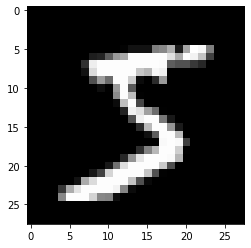

In [5]:
plt.imshow(X_train[0], cmap="gray")
print(y_train[0])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=VARIANT_NUMBER)

dim = 28*28
X_train = X_train.reshape(len(X_train), dim)
X_test = X_test.reshape(len(X_test), dim)

In [7]:
# уменьшим размерность
from sklearn.decomposition import PCA

pca = PCA(svd_solver='full')
modelPCA = pca.fit(X_train) 
X_train = modelPCA.transform(X_train)

In [8]:
# доля объясненной дисперсии
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance

array([0.097, 0.168, 0.23 , 0.283, 0.332, 0.375, 0.408, 0.437, 0.464,
       0.488, 0.509, 0.529, 0.547, 0.563, 0.579, 0.594, 0.607, 0.62 ,
       0.632, 0.643, 0.654, 0.664, 0.674, 0.683, 0.692, 0.7  , 0.708,
       0.716, 0.724, 0.73 , 0.737, 0.744, 0.75 , 0.755, 0.761, 0.767,
       0.772, 0.777, 0.781, 0.786, 0.791, 0.795, 0.799, 0.803, 0.807,
       0.811, 0.814, 0.818, 0.821, 0.825, 0.828, 0.831, 0.834, 0.837,
       0.84 , 0.842, 0.845, 0.848, 0.85 , 0.853, 0.855, 0.857, 0.86 ,
       0.862, 0.864, 0.866, 0.868, 0.87 , 0.872, 0.874, 0.876, 0.878,
       0.879, 0.881, 0.883, 0.884, 0.886, 0.888, 0.889, 0.891, 0.892,
       0.893, 0.895, 0.896, 0.897, 0.899, 0.9  , 0.901, 0.903, 0.904,
       0.905, 0.906, 0.907, 0.908, 0.909, 0.911, 0.912, 0.913, 0.914,
       0.915, 0.916, 0.917, 0.917, 0.918, 0.919, 0.92 , 0.921, 0.922,
       0.923, 0.924, 0.924, 0.925, 0.926, 0.927, 0.927, 0.928, 0.929,
       0.93 , 0.93 , 0.931, 0.932, 0.933, 0.933, 0.934, 0.935, 0.935,
       0.936, 0.936,

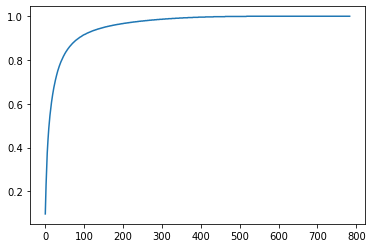

In [9]:
plt.plot(np.arange(len(explained_variance)), explained_variance, ls = '-')

In [10]:
var = round(0.80 + (VARIANT_NUMBER % 10) / 100, 2)
print(var)
dimensions = -1
for k, v in enumerate(explained_variance):
    if v > var:
        dimensions = k + 1
        break
print("Dimension:", dimensions)

0.85
Dimension: 60


In [11]:
pca = PCA(n_components=dimensions, svd_solver='full')
modelPCA = pca.fit(X_train) 

X_train = modelPCA.transform(X_train)

In [12]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=VARIANT_NUMBER)
clf = OneVsRestClassifier(tree).fit(X_train, y_train)

In [13]:
# применим полученное раннее преобразование к тестовым данным
modelPCA = pca.fit(X_test) 
X_test_transf = modelPCA.transform(X_test)

In [14]:
y_pred = clf.predict(X_test_transf)

In [15]:
from sklearn.metrics import confusion_matrix
m_confusion = confusion_matrix(y_test, y_pred)
print(m_confusion)

[[1022    0   32   11    4   92   22   13    4    6]
 [   1 1258   16   27    8    2   14    8   16    3]
 [  21   12  921   30   42   13   59   21   36   20]
 [  30    7   58  916   15   81   15   16   89    8]
 [   3    9   22    7  894   10   26   11   55  150]
 [ 123    6   59  193   30  463   45   27   79   53]
 [  27    7   61   23   21   40  963    4    9   18]
 [  21   23   19    2   30   11    8 1046   20   50]
 [  21    7   71  116    6   52   11    7  836   44]
 [  12   29   22   41  320   62   27  114   67  498]]


In [16]:
# количество объектов класса 2 отнесенных ко 2 классу
# second 2 -> count of predicted 2s
cl = VARIANT_NUMBER % 9
print(cl)
m_confusion[cl][cl]


6


963

Predicted class: 1
True class: 1


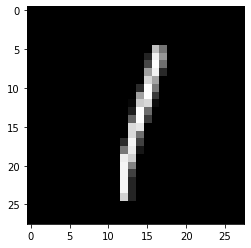

In [17]:
from random import sample
index = sample(range(len(X_test_transf)), k=1)[0]
obj = X_test[index].reshape(28, 28)
plt.imshow(obj, cmap="gray")
print(f"Predicted class: {y_pred[index]}")
print(f"True class: {y_test[index]}")

In [18]:
from random import sample
indexes = sample(range(len(X_test)), k=5)
print(indexes)
test_objects = [X_test_transf[i] for i in indexes]
for number, proba in zip(indexes, clf.predict_proba(test_objects)):
    print(f"Image #{number}: class={y_pred[number]}, proba={round(max(proba), 4)}")

[5594, 5041, 7644, 6059, 2842]
Image #5594: class=5, proba=0.3143
Image #5041: class=9, proba=0.5371
Image #7644: class=6, proba=0.7081
Image #6059: class=9, proba=0.509
Image #2842: class=4, proba=0.3397


Метрики для классификатора

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1206
           1       0.93      0.93      0.93      1353
           2       0.72      0.78      0.75      1175
           3       0.67      0.74      0.70      1235
           4       0.65      0.75      0.70      1187
           5       0.56      0.43      0.49      1078
           6       0.81      0.82      0.82      1173
           7       0.83      0.85      0.84      1230
           8       0.69      0.71      0.70      1171
           9       0.59      0.42      0.49      1192

    accuracy                           0.73     12000
   macro avg       0.72      0.73      0.72     12000
weighted avg       0.73      0.73      0.73     12000

